### 03.1 均方差损失函数

#### 3.1 均方差函数
$$
loss = {1 \over 2}(z-y)^2 \tag{单样本}
$$

$$
J=\frac{1}{2m} \sum_{i=1}^m (z_i-y_i)^2 \tag{多样本}
$$

#### 3.1.2 实际案例
假设有一组数据，我们想找到一条拟合的直线。我们先创建要拟合的目标函数 $y=wx+b$，并初始化$w,b$的值

In [38]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
w=2
b=3

def TargetFunction(x,w,b):
    y = w*x + b
    return y

然后我们随机生成50个要拟合的数据，并将其保存在本地的ch03.npz文件里

In [39]:
file_name = "ch03.npz"
def CreateSampleData(w,b,n):
    file = Path(file_name)
    #检测是否有本地文件，有则读取
    if file.exists():
        data = np.load(file)
        x = data["data"]
        y = data["label"]
    else:
        #生成n个标准的数值，介于0-1之间
        x = np.linspace(0,1,num=n)
        #随机生成一些误差，介于-0.5-0.5之间
        noise = np.random.uniform(-0.5,0.5,size=(n))
        #算出函数值，并加上误差
        y = TargetFunction(x,w,b) + noise
        #保存文件
        np.savez(file_name, data=x, label=y)
    #end if
    return x,y
m=50
x,y=CreateSampleData(w,b,m)
print(y)

[3.15988731 2.9901696  3.11825144 2.86996295 3.39146775 2.98194695
 3.41430834 3.52868654 3.27869277 3.35673824 3.82754458 3.90240679
 3.25766101 3.8481346  3.92352682 3.43501472 3.19268517 3.38319394
 3.59170058 3.83724396 4.02710228 3.49357625 3.85720633 4.05455535
 4.06027215 3.67860447 4.02679728 4.49874523 3.85063692 3.75617433
 4.37917972 3.93259886 4.47383677 4.06842943 4.82108261 4.86292921
 4.42749023 4.9954561  4.64985258 4.80218681 4.36976837 4.89670737
 4.6243258  4.35259183 4.5625206  5.14884966 4.56388047 5.11574181
 4.61959512 4.70992998]


画出数据的散点图：

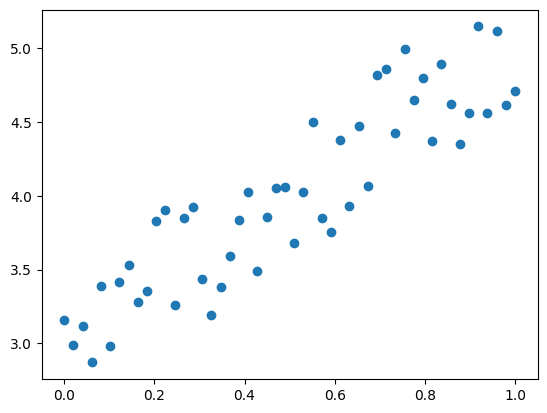

In [40]:
plt.scatter(x,y)

我们写出计算均方差的函数
$$
J=\frac{1}{2m} \sum_{i=1}^m (z_i-y_i)^2 \tag{多样本}
$$

In [41]:
def CostFunction(x,y,z,count):
    c = (z - y)**2
    loss = c.sum()/count/2
    return loss

我们手动调整$b$的数值，并通过均方差计算Loss，来展示均方差的效果，然后画出函数图
|迭代次数|b|Loss|函数|
|---|---|---|---|
|1|2|0.53|z=2x+2|
|2|2.5|0.16|z=2x+2.5|
|2|3|0.048|z=2x+3|
|2|3.5|0.18|z=2x+3.5|


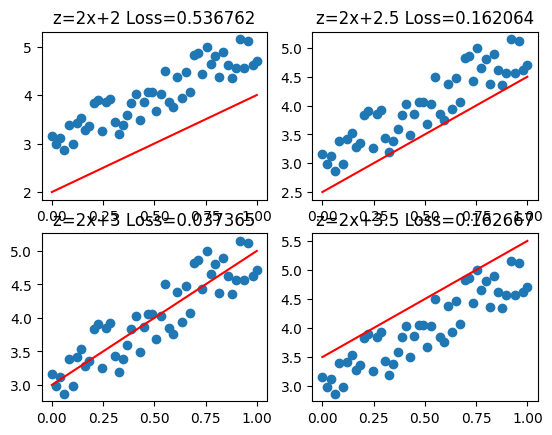

In [42]:
#绘制每个子图
def ShowResult(ax,x,y,a,loss,title):
    ax.scatter(x,y)
    ax.plot(x,a,'r')
    titles = str.format("{0} Loss={1:01f}",title,loss)
    ax.set_title(titles)

def show_cost_for_4b(x,y,n,w,b):
    #新建母图
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
    #获取预测值
    a1 = w*x+b-1
    #计算Loss
    loss1 = CostFunction(x,y,a1,n)
    #绘制子图
    ShowResult(ax1,x,y,a1,loss1,"z=2x+2")
    a2 = w*x+b-0.5
    loss2 = CostFunction(x,y,a2,n)
    ShowResult(ax2,x,y,a2,loss2,"z=2x+2.5")
    a3 = w*x+b
    loss3 = CostFunction(x,y,a3,n)
    ShowResult(ax3,x,y,a3,loss3,"z=2x+3")
    a4 = w*x+b+0.5
    loss4 = CostFunction(x,y,a4,n)
    ShowResult(ax4,x,y,a4,loss4,"z=2x+3.5")
    plt.show()
show_cost_for_4b(x,y,m,w,b)

把这4个图的内容显示在一张图上

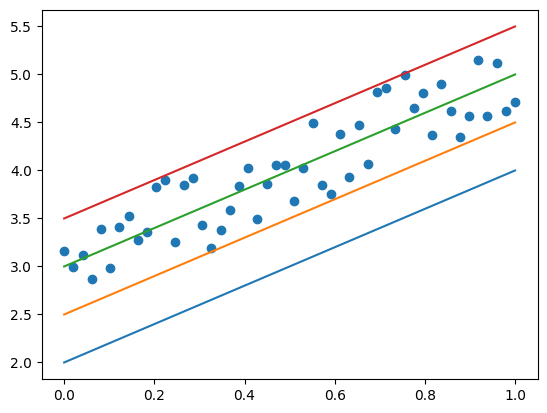

In [43]:
def show_all_4b(x,y,n,w,b):
    plt.scatter(x,y)
    z1 = w*x + b-1
    loss1 = CostFunction(x,y,z1,n)
    plt.plot(x,z1)

    z2 = w*x+b-0.5
    loss2 = CostFunction(x,y,z2,n)
    plt.plot(x,z2)

    z3 = w*x+b
    loss3 = CostFunction(x,y,z3,n)
    plt.plot(x,z3)

    z4 = w*x+b+0.5
    loss4 = CostFunction(x,y,z4,n)
    plt.plot(x,z4)
    plt.show()
show_all_4b(x,y,m,w,b)

我们假设该拟合直线的方程是 $y=2x+3$，当我们固定 $w=2$，把 $b$ 值从 $2$ 到 $4$ 变化时，画出损失函数值的变化

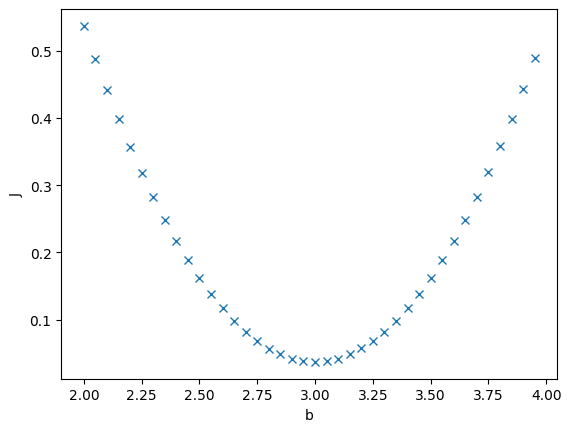

In [44]:
def CalculateCostB(x,y,n,w,b):
    #设置B的一系列数值
    B = np.arange(b-1,b+1,0.05)
    Loss=[]
    for i in range(len(B)):
        z = w*x+B[i]
        #求损失函数值
        loss = CostFunction(x,y,z,n)
        Loss.append(loss)
    plt.xlabel("b")
    plt.ylabel("J")
    plt.plot(B,Loss,'x')
    plt.show()
CalculateCostB(x,y,m,w,b)

我们假设该拟合直线的方程是 $y=2x+3$，当我们固定 $b=3$，把 $w$ 值从 $1$ 到 $3$ 变化时，画出损失函数值的变化

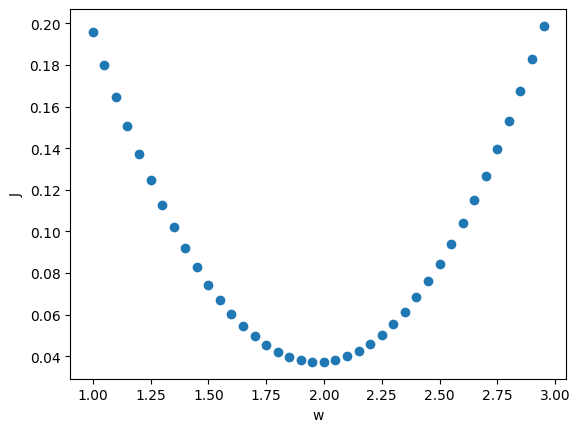

In [45]:
def CalculateCostW(x,y,n,w,b):
    W = np.arange(w-1,w+1,0.05)
    Loss=[]
    for i in range(len(W)):
        z = W[i]*x+b
        loss = CostFunction(x,y,z,n)
        Loss.append(loss)
    plt.xlabel("w")
    plt.ylabel("J")
    plt.plot(W,Loss,'o')
    plt.show()
CalculateCostW(x,y,m,w,b)

#### 3.1.3 损失函数的可视化

##### 损失函数值的3D示意图
横坐标为 $w$，纵坐标为 $b$，针对每一个$(w,b)$的组合计算出一个损失函数值，用三维图的高度来表示这个损失函数值

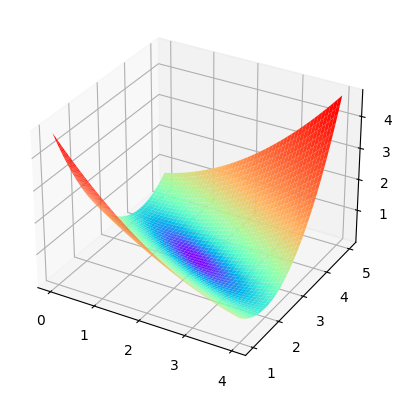

In [46]:
def show_3d_surface(x,y,m,w,b):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    #重塑数据的维度，变成m维的二维数组
    X = x.reshape(m,1)
    Y = y.reshape(m,1)
    len1 = 50
    len2 = 50
    len = len1 * len2
    W = np.linspace(w-2, w+2, len1)
    B = np.linspace(b-2, b+2, len2)
    #矩阵化
    W, B = np.meshgrid(W, B)
    #m=50
    m = X.shape[0]
    #W.ravel().reshape(1,len) 变成一维数组之后，再变成二维数组
    #Z = X*W + B
    Z = np.dot(X, W.ravel().reshape(1,len)) + B.ravel().reshape(1,len)
    #计算Loss
    Loss1 = (Z - Y)**2
    Loss2 = Loss1.sum(axis=0,keepdims=True)/m/2
    Loss3 = Loss2.reshape(len1, len2)
    ax.plot_surface(W, B, Loss3, norm=LogNorm(), cmap='rainbow')
show_3d_surface(x,y,m,w,b)

##### 损失函数值的2D示意图

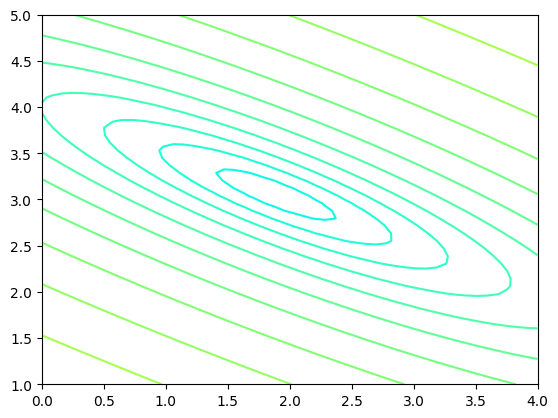

In [47]:
def draw_contour(x,y,m,w,b):
    X = x.reshape(m,1)
    Y = y.reshape(m,1)
    len1 = 50
    len2 = 50
    len = len1 * len2
    W = np.linspace(w-2, w+2, len1)
    B = np.linspace(b-2, b+2, len2)
    W, B = np.meshgrid(W, B)
    LOSS = np.zeros((len1, len2))
    m = X.shape[0]
    Z = np.dot(X, W.ravel().reshape(1,len)) + B.ravel().reshape(1,len)
    Loss1 = (Z - Y)**2
    Loss2 = Loss1.sum(axis=0,keepdims=True)/m/2
    Loss3 = Loss2.reshape(len1, len2)
    plt.contour(W,B,Loss3,levels=np.logspace(-5, 5, 50), norm=LogNorm(), cmap=plt.cm.jet)
draw_contour(x,y,m,w,b)